# Sentiment Analysis_Spanish Twiters


OBJ: To define the best model to predict sentimient(Positive, Negative, Neutro), based on the twiter messages


## Libraries

In [1]:
# DAta and numbers utility

import pandas as pd 

import numpy as np

# NLP processing
import spacy
from sklearn.model_selection import train_test_split  
from sklearn.feature_extraction.text import CountVectorizer


# ML models
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# metricas - Evaluation

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

# errors
import warnings
warnings.filterwarnings('ignore')

## functions

In [2]:

def normalize(sentenses):
    """normalizamos la lista de frases y devolvemos la misma lista de frases normalizada"""
    for index, sentense in enumerate(sentenses):
        # Tokenizamos el documento realizando los puntos 1,2 y 3.
        sentense = nlp(sentense.lower().replace('.', ' ').replace('#', ' ').strip())# paso a lower case y sustituyo puntos y # por espacios 
        # The strip() method removes any leading (spaces at the beginning) and trailing (spaces at the end) characters (space is the default leading character to remove
        
        sentenses[index] = " ".join([word.lemma_ for word in sentense if (not word.is_punct) # me quedo con los No puntuacion
                                     and (len(word.text) > 2) and (not word.is_stop)  # me quedo con los que son mayoes que 2 caracteres
                                     and (not word.text.startswith('@')) # elimino los que empiezan por@ (que suelen ser usuarios y no me dan informacion)
                                     and (not word.text.startswith('http')) #idem con http, que son direcciones web
                                     and (not ':' in word.text)]) # me elimino los dos puntos 
    return sentenses


<hr>


## Carga de Datos

In [3]:

tweets_file = './Datos/tweets_castellano.txt'
df = pd.read_csv(tweets_file, sep="::::", names=['tweet','sentimiento'] ,engine='python')
df = df[df['sentimiento'].isin(['positivo', 'neutro', 'negativo'])] #  NON rated tweet 'sentimiento' not selected
tweets = [tuple(x) for x in df.values]
print('Número de Tweets Cargados: {num}'.format(num=len(tweets)))
df.head(7)

Número de Tweets Cargados: 5735


,tweet,sentimiento
1,@PauladeLasHeras No te libraras de ayudar me/n...,neutro
2,@marodriguezb Gracias MAR,positivo
3,"Off pensando en el regalito Sinde, la que se v...",negativo
4,Conozco a alguien q es adicto al drama! Ja ja ...,positivo
6,Toca @crackoviadeTV3 . Grabación dl especial N...,positivo
8,Buen día todos! Lo primero mandar un abrazo gr...,positivo
9,Desde el escaño. Todo listo para empezar #endi...,positivo


<AxesSubplot:>

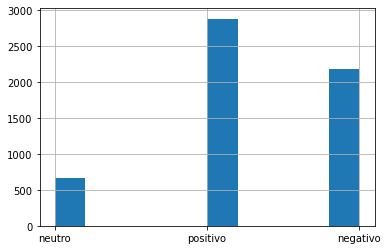

In [4]:
# distribution of 'sentimiento'
df['sentimiento'].hist()

In [5]:
# transforming into columns  for modeling
X= [doc[0] for doc in tweets]
y = [doc[1] for doc in tweets]

<hr>


## Normalization




Including
   - converting  tokens into lowcase
   - deleting punctions
   - Selecting only words> 3 char
   - Deleting stop-words
   -  Deleting links 
    

* Loading NLP Spanish model

In [6]:
nlp = spacy.load('es_core_news_sm')

In [7]:
X_norm=normalize(X)

<hr>


## Bag of Words



In [8]:
# 200 words more frequent with at least 3 charcter
vectorizer = CountVectorizer(max_features=2000, min_df=3)

# trasnforming tweets to the BoW

X_norm_vect = vectorizer.fit_transform(X_norm)

In [9]:
# Looking at the results

print(vectorizer.get_feature_names()) 


['000', '0l0hzkdb', '10', '100', '11', '110', '12', '130', '15', '150', '15h', '17congresopp', '1812', '20', '200', '2008', '2009', '2010', '2011', '2012', '2020', '20n', '22', '23f', '25', '25mrebélate', '300', '30h', '38congresopsoe', '40', '400', '50', '500', '70', '700', '75', '7714', 'abajo', 'abandonar', 'abc', 'abcdesevillo', 'abertzale', 'abierto', 'abogado', 'aborto', 'abrazar', 'abrazo', 'abril', 'abrir', 'absoluto', 'acabar', 'acceso', 'accidente', 'acción', 'aceptar', 'acercar', 'acertado', 'acertar', 'aclarar', 'acoger', 'acompañar', 'acordar', 'actitud', 'actividad', 'activo', 'acto', 'actor', 'actuación', 'actual', 'actualización', 'actuar', 'acudir', 'acuerdo', 'acusación', 'acusado', 'acusar', 'adecuado', 'adelantar', 'adiós', 'administración', 'administrativo', 'admiración', 'admitir', 'adolescente', 'adorar', 'aeropuerto', 'afectado', 'afectar', 'afganistar', 'afganistán', 'afirmar', 'afrontar', 'agencia', 'agente', 'agradecer', 'agresión', 'agricultura', 'agrupación

<AxesSubplot:title={'center':'Palabras con freq>100'}>

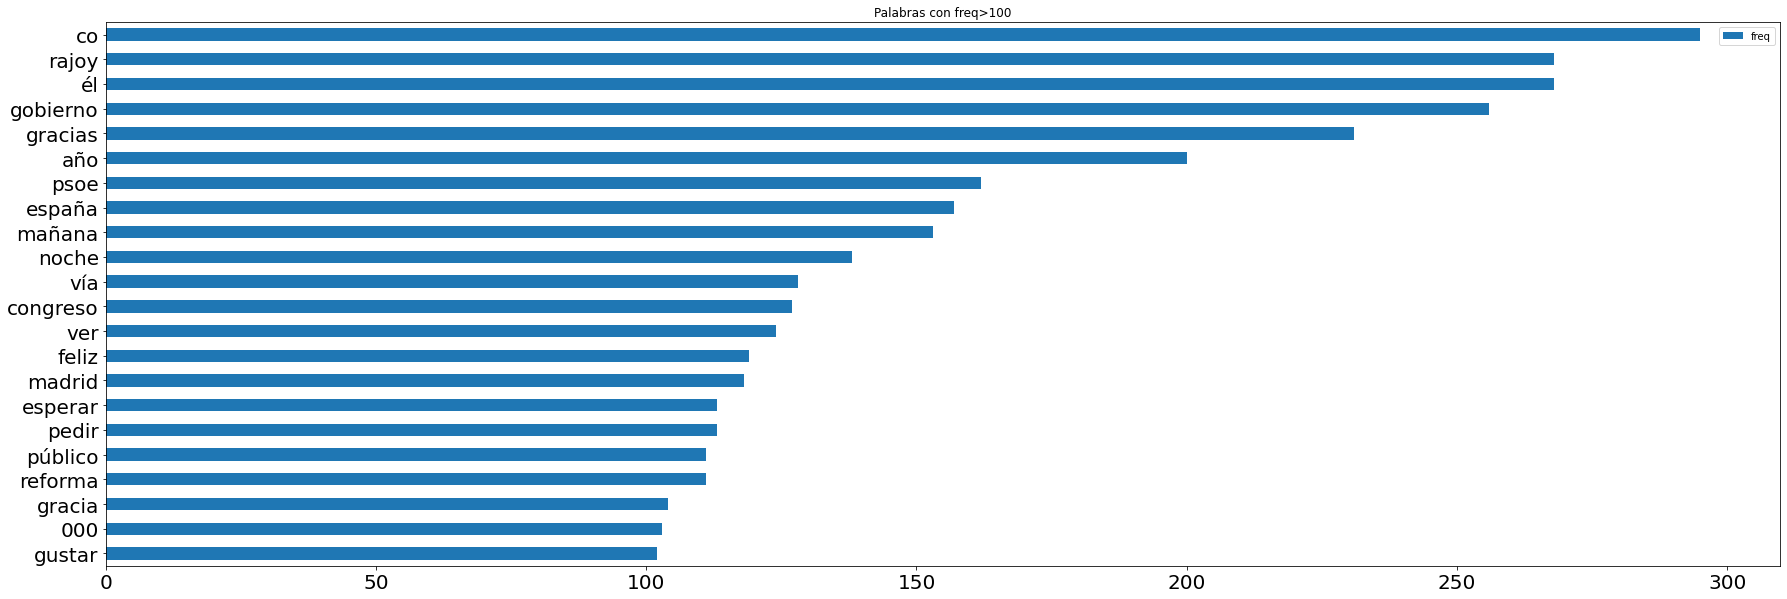

In [10]:
# Visualization of words >100 repeated

#  BoW to dataframe
count_list = np.asarray(X_norm_vect.sum(axis=0))[0]
word_list = vectorizer.get_feature_names()
bow_dic=dict(zip(word_list, count_list)) # BoW to dic
bow_df=pd.DataFrame(bow_dic,index=['freq']).transpose() # BoW_dictionario  to dataFrame

#chart
bow_df[bow_df['freq']>100].sort_values(by='freq',ascending=True).plot(kind='barh',figsize=(30,10),table=False,fontsize=20, title="Palabras con freq>100")


* Still there are 2/charc token


<AxesSubplot:title={'center':'Palabras con freq>100'}>

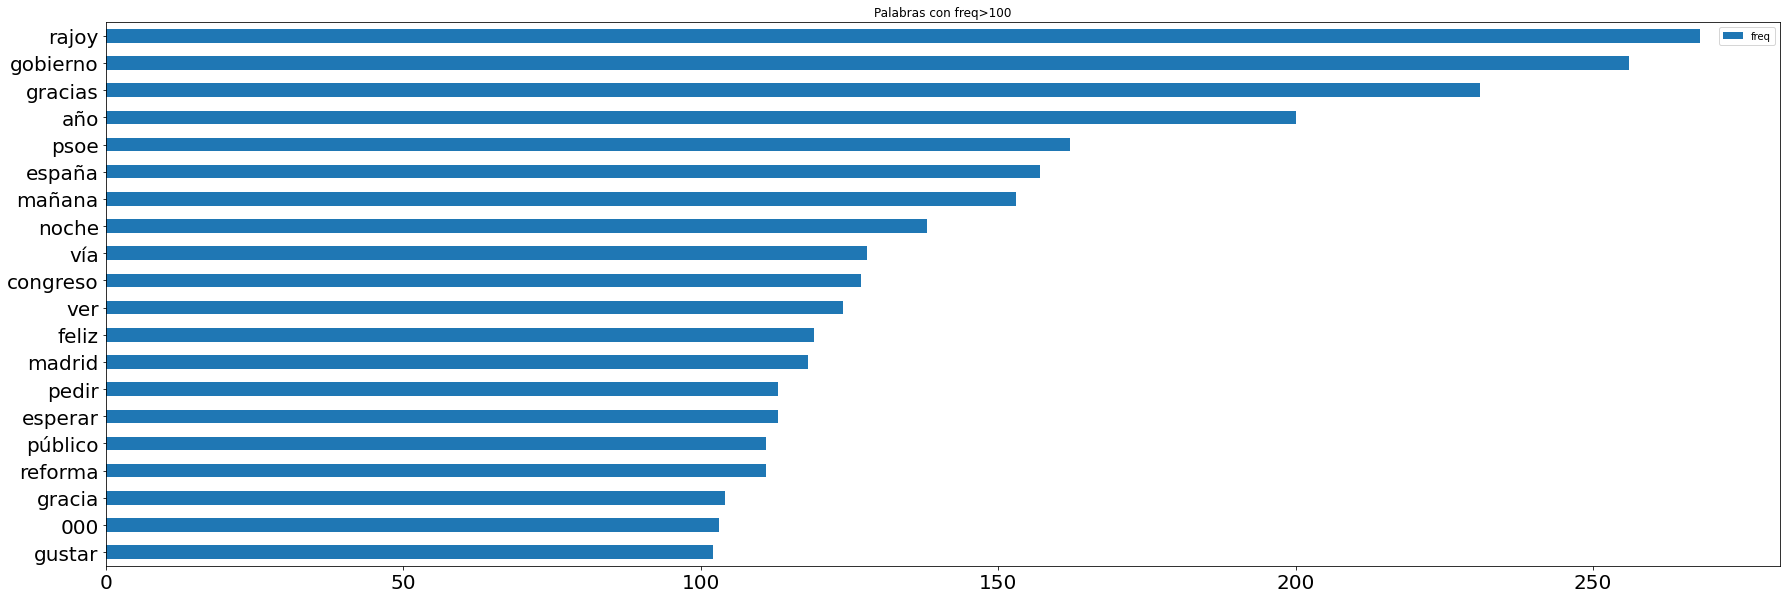

In [11]:
#  filtering with index of token with  #charct>2 

lista_indexes=[]
for i in range(0,len(bow_df)):
    if len(bow_df.index.values[i])>2:
        lista_indexes.append(i)
      

bow_df=bow_df.iloc[lista_indexes]

bow_df[bow_df['freq']>100].sort_values(by='freq',ascending=True).plot(kind='barh',figsize=(30,10),table=False,fontsize=20, title="Palabras con freq>100")


<hr>


## Spliting Data (Train 80% and Test 20%)



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_norm_vect, y, test_size=0.2, random_state=42)

<hr>


## Modeling
 
 
 ### models to be used
 
* Multinomial Naive Bayes
* Bernoulli Naive Bayes
* Regresion Logistica
* Support Vector Machine
* Random Forest

In [13]:
# models loading

mnb = MultinomialNB()
bnb = BernoulliNB()
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
svm_lin = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
rf = RandomForestClassifier(n_estimators=200, bootstrap=True, criterion='gini', max_depth=50, random_state=0)

clasificadores = {'Multinomial Naive Bayes': mnb,
                  'Bernoulli Naive Bayes': bnb,
                  'Regresion Logistica': lr,
                  'SVM lineal': svm_lin,
                  'SVM rbf': svm_rbf,
                  'Random Forest': rf}


# Fitting and accuracy calculation
for k, v in clasificadores.items():
    print ('CRETING MODEL: {clas}'.format(clas=k))
    v.fit(X_train, y_train)
    accuracy_train = v.score(X_train, y_train)
    print ('\tAccuracy Train: {acc_train}'.format(acc_train=accuracy_train))

CRETING MODEL: Multinomial Naive Bayes
	Accuracy Train: 0.7870531822144725
CRETING MODEL: Bernoulli Naive Bayes
	Accuracy Train: 0.769180470793374
CRETING MODEL: Regresion Logistica
	Accuracy Train: 0.8711857018308631
CRETING MODEL: SVM lineal
	Accuracy Train: 0.8816477768090671
CRETING MODEL: SVM rbf
	Accuracy Train: 0.8825196163905842
CRETING MODEL: Random Forest
	Accuracy Train: 0.762205754141238


<hr>


## Model Evaluation

Metrics to be used for each model:

* Accuracy
* Precision
* Recall
* F1

In [14]:
def evaluation(model, name, X_train, y_train, X_test, y_test):
    """
   
    Accuracy, Precision, Recall and F1 data
        model: model to evaluate
        name: model name
        return: diccionary with model names and thier metrics
    """
    model_dict = {}
    model_dict['name'] = name
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    model_dict['accuracy_train'] = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    model_dict['accuracy_tests'] = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    model_dict['precision_train'] = precision_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['precision_tests'] = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['recall_train'] = recall_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['recall_tests'] = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    model_dict['f1_train'] = f1_score(y_true=y_train, y_pred=y_pred_train, average='weighted')
    model_dict['f1_tests'] = f1_score(y_true=y_test, y_pred=y_pred_test, average='weighted')
    
    return model_dict


# metrics
evaluacion = list()
for key, model in clasificadores.items():
    evaluacion.append(evaluation(model=model, name=key, 
                                 X_train=X_train, y_train=y_train,
                                 X_test=X_test, y_test=y_test))

# results to DF
results = pd.DataFrame.from_dict(evaluacion)
results.set_index("name", inplace=True)
results

,accuracy_train,accuracy_tests,precision_train,precision_tests,recall_train,recall_tests,f1_train,f1_tests
name,,,,,,,,
Multinomial Naive Bayes,0.787053,0.677419,0.786625,0.647264,0.787053,0.677419,0.779382,0.658540
Bernoulli Naive Bayes,0.769180,0.669573,0.769904,0.628494,0.769180,0.669573,0.753846,0.639651
Regresion Logistica,0.871186,0.650392,0.875440,0.614927,0.871186,0.650392,0.865803,0.626618
SVM lineal,0.881648,0.626853,0.885592,0.591455,0.881648,0.626853,0.878504,0.605563
SVM rbf,0.882520,0.652136,0.893475,0.572032,0.882520,0.652136,0.873524,0.608620
Random Forest,0.762206,0.628596,0.829939,0.559669,0.762206,0.628596,0.738333,0.571707


<AxesSubplot:title={'center':'f1_test-metrica'}, ylabel='name'>

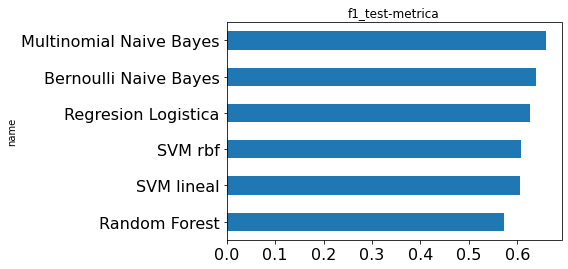

In [15]:
results['f1_tests'].sort_values(ascending=True).plot(kind='barh',fontsize=16, title="f1_test-metrica")